<h3> Course 5, Task 3, Build and Evaluate Models<h3>
<h5>Asad Aftab<h5>

In [25]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from pprint import pprint

In [26]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model

In [27]:
#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [28]:
#cross validation
from sklearn.model_selection import train_test_split

In [29]:
#data
credit = pd.read_csv('default of credit card clients.csv', header=1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [31]:
#features
features = credit.iloc[:,1:23]   # select all cloumns other than the ID column
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [32]:
#dependent variable
depVar = credit['default payment next month']
print (depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.3, random_state = 0)

In [35]:
X_train.shape, X_test.shape

((21000, 22), (9000, 22))

In [36]:
print('Shape of Y training/test set', y_train.shape, y_test.shape)
print('The number of observations in the Y training set are:',str(len(y_train.index)))
print('The number of observations in the Y test set are:',str(len(y_test.index)))    # Ground truth

Shape of Y training/test set (21000,) (9000,)
The number of observations in the Y training set are: 21000
The number of observations in the Y test set are: 9000


In [37]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
15925,30000,2,2,2,31,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
10062,200000,1,2,1,31,1,2,2,0,0,...,31302,29192,28170,28763,28453,3019,6,991,1032,1310
19376,500000,2,4,2,38,-2,-2,-2,-2,-2,...,2265,24667,40626,9255,8659,2265,24905,40827,30844,8695
6384,20000,2,2,2,22,0,0,0,0,0,...,18520,39053,20055,19606,19925,1298,1909,1666,5000,703
15976,50000,2,2,1,48,1,2,0,0,0,...,18106,19793,19378,18874,19361,0,2000,1500,1000,2000


In [38]:
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
8225,20000,1,1,2,33,1,2,2,2,2,...,17399,19057,18453,19755,19288,0,2260,0,1600,0
10794,20000,2,2,2,35,0,0,2,0,0,...,19347,18600,19000,19000,20000,3400,0,1000,0,1000
9163,230000,2,1,1,44,1,-1,-1,-1,-1,...,949,2864,933,0,0,949,2873,933,0,0
26591,100000,1,2,1,42,0,0,0,0,0,...,99998,16138,17758,18774,20272,5000,2000,2000,2000,2000
6631,150000,1,1,2,29,-2,-2,-2,-2,-2,...,6917,831,6469,5138,7810,6989,833,6488,5153,7833


In [39]:
y_train.head()

15925    0
10062    0
19376    0
6384     0
15976    1
Name: default payment next month, dtype: int64

In [40]:
y_test.head()

8225     0
10794    0
9163     0
26591    0
6631     0
Name: default payment next month, dtype: int64

<h3>Three Models for Classification<h3>

In [41]:
#Models, using parameters for tuning and to avoid future warnings
modelSVC = SVC(gamma='scale', C=3)
modelRF = RandomForestClassifier(n_estimators = 100, max_depth = 20)  # restrict max-depth to avoid over-fitting
modelLR = LogisticRegression(solver = 'lbfgs', max_iter=2000)

<h3>Random Forest Classifier<h3>

In [19]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<h3>Support Vector Classifier<h3>

In [19]:
modelSVC.fit(X_train,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<h3>Logistic Regression<h3>

In [52]:
modelLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h3>Comparing and choosing the right model<h3>

<h3>1. Random Forest Classification Model Fitting and Scoring<h3>

In [60]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train, cv = 5))
modelRF.score(X_train,y_train)

[0.81766246 0.815      0.81428571 0.81166667 0.81328888]


0.9492380952380952

<h3>2.Support Vector Classification Model Fitting and Scoring<h3>

In [20]:
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train, cv = 5)) 
modelSVC.score(X_train,y_train)

[0.7752916  0.77571429 0.77595238 0.77619048 0.77637533]


0.7771428571428571

<h3>3. Logistic Regression Model Fitting and Scoring<h3>

In [53]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train, cv = 5)) 
modelLR.score(X_train,y_train)

[0.77624375 0.77642857 0.77619048 0.77619048 0.77566087]


0.7762857142857142

<h3>Feature Engineering using RFE<h3>

In [51]:
# feature extraction using RFE and LR
from sklearn.feature_selection import RFE
modelRFE = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = RFE(modelRFE, 6)
fitRFE = rfe.fit(X_train, y_train)
print("Num Features: %d" % fitRFE.n_features_)
print("Selected Features: %s" % fitRFE.support_)
print("Feature Ranking: %s" % fitRFE.ranking_)

Num Features: 6
Selected Features: [False  True  True  True False  True  True  True False False False False
 False False False False False False False False False False]
Feature Ranking: [15  1  1  1  5  1  1  1  4  3  2 10  9 14 17 13 16  6  7  8 11 12]


In [52]:
# which features were picked?
cols = list(X_train.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3'], dtype='object')


In [57]:
# Model fitting
modelRFE.fit(X_train,y_train)
modelRFE.score(X_train,y_train)

0.7762857142857142

In [59]:
# feature extraction using RFE and RF
modelRFE2 = RandomForestClassifier(n_estimators = 100, max_depth = 20)
rfe2 = RFE(modelRFE2, 6)
fitRFE2 = rfe2.fit(X_train, y_train)
print("Num Features: %d" % fitRFE2.n_features_)
print("Selected Features: %s" % fitRFE2.support_)
print("Feature Ranking: %s" % fitRFE2.ranking_)

Num Features: 6
Selected Features: [False False False False False  True False False False False False  True
  True  True  True False  True False False False False False]
Feature Ranking: [ 7 17 15 16  5  1  6 11 13 12 14  1  1  1  1  3  1  2  4  8 10  9]


In [60]:
# which features were picked?
cols = list(X_train.columns)
temp = pd.Series(rfe2.support_,index = cols)
selected_features_rfe2 = temp[temp==True].index
print(selected_features_rfe2)

Index(['PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT6'],
      dtype='object')


In [61]:
# Model fitting
modelRFE2.fit(X_train,y_train)
modelRFE2.score(X_train,y_train)

0.9502380952380952

<h3>Making Predictions<h3>

In [61]:
#Make Predictions using RF
predictionsrf = modelRF.predict(X_test)
Accuracy = accuracy_score(y_test,predictionsrf)
Kappa = cohen_kappa_score(y_test, predictionsrf)
print('Random Forest Classification')
print('Accuracy: %.3f' % Accuracy)
print('Kappa: %.3f' % Kappa)

Random Forest Classification
Accuracy: 0.821
Kappa: 0.366


In [64]:
#Make Predictions using SVC
predictionsvc = modelSVC.predict(X_test)
Accuracy = accuracy_score(y_test,predictionsvc)
Kappa = cohen_kappa_score(y_test, predictionsvc)
print('Support Vector Classification')
print('Accuracy: %.3f' % Accuracy)
print('Kappa: %.3f' % Kappa)

Support Vector Classification
Accuracy: 0.784
Kappa: 0.000


In [65]:
#Make Predictions using Logistic Regression
predictionslr = modelLR.predict(X_test)
Accuracy = accuracy_score(y_test,predictionslr)
Kappa = cohen_kappa_score(y_test, predictionslr)
print('Logistic Regression')
print('Accuracy: %.3f' % Accuracy)
print('Kappa: %.3f' % Kappa)

Logistic Regression
Accuracy: 0.785
Kappa: 0.001


In [62]:
#Make Predictions using RFE set for LR
predictionsRFE = fitRFE.predict(X_test)
Accuracy = accuracy_score(y_test,predictionsRFE)
Kappa = cohen_kappa_score(y_test, predictionsRFE)
print('Using RFE and LR')
print('Accuracy: %.3f' % Accuracy)
print('Kappa: %.3f' % Kappa)

Using RFE and LR
Accuracy: 0.813
Kappa: 0.260


In [63]:
#Make Predictions using RFE set for RF
predictionsRFE2 = fitRFE2.predict(X_test)
Accuracy = accuracy_score(y_test,predictionsRFE2)
Kappa = cohen_kappa_score(y_test, predictionsRFE2)
print('Using RFE and RF')
print('Accuracy: %.3f' % Accuracy)
print('Kappa: %.3f' % Kappa)

Using RFE and RF
Accuracy: 0.824
Kappa: 0.364


<h3>Plotting the Results with best model i.e. Random Forest<h3>

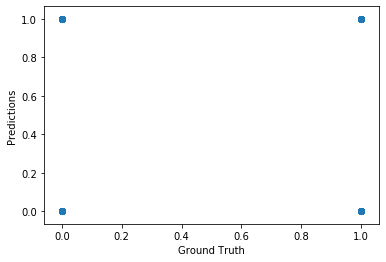

In [68]:
plt.scatter(y_test, predictionsrf, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

<h3>Model Tuning For Random Forest Classifier<h3>
    <h5>same concept can be used for other models<h5>

In [42]:
rf = RandomForestClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [45]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [47]:
# using the values from best_params_ above
base_model = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt',
                                    max_depth = 50, bootstrap = True, random_state = 42)
#Model Fitting
base_model.fit(X_train,y_train)
print(cross_val_score(base_model, X_train, y_train, cv = 5))
base_model.score(X_train, y_train)

[0.81980481 0.82095238 0.81571429 0.8102381  0.81781377]


0.904952380952381

In [48]:
#Make Predictions using RF with model tuning
predictionsrf1 = base_model.predict(X_test)
Accuracy = accuracy_score(y_test,predictionsrf1)
Kappa = cohen_kappa_score(y_test, predictionsrf1)
print('Random Forest Classification with model tuning')
print('Accuracy: %.3f' % Accuracy)
print('Kappa: %.3f' % Kappa)

Random Forest Classification with model tuning
Accuracy: 0.822
Kappa: 0.370


<h3>The accuracy and kappa slightly improved with model tuning<h3>

<h3>Plotting the results<h3>

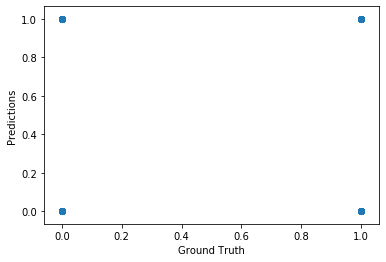

In [64]:
plt.scatter(y_test, predictionsrf1, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

<h3>End of Task 3<h3>